In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [2]:
data = pd.read_csv('../Data_bases/data_for_clustering.csv')

In [3]:
data.head()

brand                   model  battery_capacity_(mah)  \
0  OnePlus  7T Pro McLaren Edition                    4085   
1   Realme                  X2 Pro                    4000   
2    Apple       iPhone 11 Pro Max                    3969   
3    Apple               iPhone 11                    3110   
4       LG               G8X ThinQ                    4000   

   screen_size_(inches) touchscreen  resolution_x  resolution_y  processor  \
0                  6.67         Yes          1440          3120          8   
1                  6.50         Yes          1080          2400          8   
2                  6.50         Yes          1242          2688          6   
3                  6.10         Yes           828          1792          6   
4                  6.40         Yes          1080          2340          8   

   ram_(mb)  internal_storage_(gb)  rear_camera  front_camera  \
0     12000                  256.0         48.0          16.0   
1      6000                   64.0         64.0          16.0   
2      4000                   64.0         12.0          12.0   
3      4000                   64.0         12.0          12.0   
4      6000                  128.0         12.0          32.0   

  operating_system wi-fi bluetooth  gps  number_of_sims   3g 4g/_lte    price  
0          Android   Yes       Yes  Yes               2  Yes     Yes   707.98  
1          Android   Yes       Yes  Yes               2  Yes     Yes   335.99  
2              iOS   Yes       Yes  Yes               2  Yes     Yes  1282.80  
3              iOS   Yes       Yes  Yes               2  Yes     Yes   754.80  
4          Android   Yes       Yes  Yes               1   No      No   599.88

In [4]:
data.columns

Index(['brand', 'model', 'battery_capacity_(mah)', 'screen_size_(inches)',
       'touchscreen', 'resolution_x', 'resolution_y', 'processor', 'ram_(mb)',
       'internal_storage_(gb)', 'rear_camera', 'front_camera',
       'operating_system', 'wi-fi', 'bluetooth', 'gps', 'number_of_sims', '3g',
       '4g/_lte', 'price'],
      dtype='object')

In [5]:
data = data.drop(['model', "brand"], axis=1)

In [6]:
data_num = data.select_dtypes([np.number])
data_cat = data.select_dtypes(include=['object'])

In [7]:
data_cat.columns

Index(['touchscreen', 'operating_system', 'wi-fi', 'bluetooth', 'gps', '3g',
       '4g/_lte'],
      dtype='object')

In [8]:
data_num.drop(['price'],axis=1)

battery_capacity_(mah)  screen_size_(inches)  resolution_x  \
0                       4085                  6.67          1440   
1                       4000                  6.50          1080   
2                       3969                  6.50          1242   
3                       3110                  6.10           828   
4                       4000                  6.40          1080   
...                      ...                   ...           ...   
1354                    1500                  4.00           480   
1355                    2000                  5.00           480   
1356                    1700                  4.50           480   
1357                    1250                  4.00           480   
1358                    2150                  5.00           480   

      resolution_y  processor  ram_(mb)  internal_storage_(gb)  rear_camera  \
0             3120          8     12000                256.000         48.0   
1             2400          8      6000                 64.000         64.0   
2             2688          6      4000                 64.000         12.0   
3             1792          6      4000                 64.000         12.0   
4             2340          8      6000                128.000         12.0   
...            ...        ...       ...                    ...          ...   
1354           800          4       512                  8.000          5.0   
1355           854          4      1000                  8.000          8.0   
1356           854          2       512                  4.000          5.0   
1357           800          1       256                  0.512          2.0   
1358           854          4      1000                  8.000          8.0   

      front_camera  number_of_sims  
0             16.0               2  
1             16.0               2  
2             12.0               2  
3             12.0               2  
4             32.0               1  
...            ...             ...  
1354           0.3               2  
1355           5.0               2  
1356           2.0               2  
1357           0.3               2  
1358           0.0               2  

[1359 rows x 10 columns]

In [9]:
transformer = StandardScaler().fit(data_num)
data_num_scaled = transformer.transform(data_num)

data_num_scaled = pd.DataFrame(data_num_scaled, columns=data_num.columns)

In [10]:
encoder = OneHotEncoder(drop='first').fit(data_cat)

data_cat_enc = encoder.transform(data_cat).toarray()
data_cat_enc = pd.DataFrame(data_cat_enc, columns=encoder.get_feature_names_out())



In [11]:
X = pd.concat([data_num_scaled, data_cat_enc], axis = 1)

<AxesSubplot:>

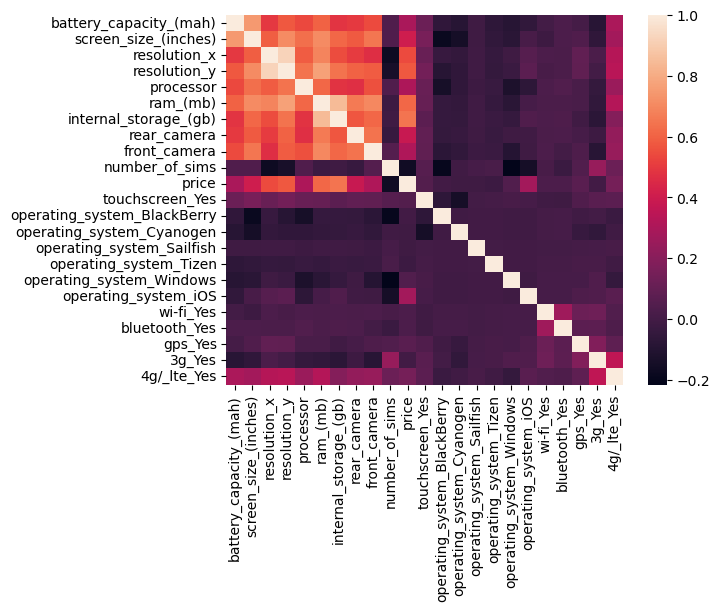

In [12]:
sns.heatmap(X.corr())

In [13]:
X.describe()

battery_capacity_(mah)  screen_size_(inches)  resolution_x  \
count            1.359000e+03          1.359000e+03  1.359000e+03   
mean            -1.619749e-15         -9.799209e-16 -6.457103e-16   
std              1.000368e+00          1.000368e+00  1.000368e+00   
min             -2.208550e+00         -4.308253e+00 -2.112073e+00   
25%             -7.312124e-01         -4.340719e-01 -3.382870e-01   
50%              7.044341e-02         -1.360580e-01 -3.382870e-01   
75%              6.430547e-01          6.089769e-01  9.920523e-01   
max              3.506111e+00          2.993089e+00  4.983070e+00   

       resolution_y     processor      ram_(mb)  internal_storage_(gb)  \
count  1.359000e+03  1.359000e+03  1.359000e+03           1.359000e+03   
mean  -4.345147e-15 -4.485742e-15 -1.071173e-15           1.325650e-15   
std    1.000368e+00  1.000368e+00  1.000368e+00           1.000368e+00   
min   -2.099768e+00 -2.072700e+00 -1.457349e+00          -8.281982e-01   
25%   -3.780260e-01 -7.064273e-01 -8.947907e-01          -6.133439e-01   
50%   -3.780260e-01 -7.064273e-01 -2.937670e-01          -3.967568e-01   
75%    7.698020e-01  1.115270e+00  3.072567e-01           3.641739e-02   
max    4.213286e+00  2.026119e+00  5.716470e+00           1.303164e+01   

        rear_camera  front_camera  number_of_sims  ...  \
count  1.359000e+03  1.359000e+03    1.359000e+03  ...   
mean   3.125903e-15 -9.169347e-16   -8.169412e-17  ...   
std    1.000368e+00  1.000368e+00    1.000368e+00  ...   
min   -1.349373e+00 -1.118357e+00   -2.227245e+00  ...   
25%   -4.550227e-01 -8.005504e-01    4.442694e-01  ...   
50%    1.451098e-02 -3.238402e-01    4.442694e-01  ...   
75%    1.039460e-01  1.528700e-01    4.442694e-01  ...   
max    1.072435e+01  6.509006e+00    3.115783e+00  ...   

       operating_system_Cyanogen  operating_system_Sailfish  \
count                1359.000000                1359.000000   
mean                    0.007358                   0.000736   
std                     0.085496                   0.027126   
min                     0.000000                   0.000000   
25%                     0.000000                   0.000000   
50%                     0.000000                   0.000000   
75%                     0.000000                   0.000000   
max                     1.000000                   1.000000   

       operating_system_Tizen  operating_system_Windows  operating_system_iOS  \
count             1359.000000               1359.000000           1359.000000   
mean                 0.002208                  0.013981              0.012509   
std                  0.046949                  0.117454              0.111184   
min                  0.000000                  0.000000              0.000000   
25%                  0.000000                  0.000000              0.000000   
50%                  0.000000                  0.000000              0.000000   
75%                  0.000000                  0.000000              0.000000   
max                  1.000000                  1.000000              1.000000   

         wi-fi_Yes  bluetooth_Yes      gps_Yes       3g_Yes  4g/_lte_Yes  
count  1359.000000    1359.000000  1359.000000  1359.000000  1359.000000  
mean      0.994113       0.988962     0.920530     0.893304     0.744665  
std       0.076527       0.104517     0.270571     0.308840     0.436210  
min       0.000000       0.000000     0.000000     0.000000     0.000000  
25%       1.000000       1.000000     1.000000     1.000000     0.000000  
50%       1.000000       1.000000     1.000000     1.000000     1.000000  
75%       1.000000       1.000000     1.000000     1.000000     1.000000  
max       1.000000       1.000000     1.000000     1.000000     1.000000  

[8 rows x 23 columns]

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   battery_capacity_(mah)       1359 non-null   float64
 1   screen_size_(inches)         1359 non-null   float64
 2   resolution_x                 1359 non-null   float64
 3   resolution_y                 1359 non-null   float64
 4   processor                    1359 non-null   float64
 5   ram_(mb)                     1359 non-null   float64
 6   internal_storage_(gb)        1359 non-null   float64
 7   rear_camera                  1359 non-null   float64
 8   front_camera                 1359 non-null   float64
 9   number_of_sims               1359 non-null   float64
 10  price                        1359 non-null   float64
 11  touchscreen_Yes              1359 non-null   float64
 12  operating_system_BlackBerry  1359 non-null   float64
 13  operating_system_C

In [15]:
#X[[0,1,2,3,4,5,6]] = X[[0,1,2,3,4,5,6]].fillna(0)

In [16]:
X.head()

battery_capacity_(mah)  screen_size_(inches)  resolution_x  resolution_y  \
0                1.313010              2.054345      2.322392      2.921979   
1                1.215666              1.801033      0.992052      1.630673   
2                1.180164              1.801033      1.590705      2.147195   
3                0.196418              1.205005      0.060815      0.540236   
4                1.215666              1.652026      0.992052      1.523064   

   processor  ram_(mb)  internal_storage_(gb)  rear_camera  front_camera  \
0   1.115270  5.716470               6.100856     4.016727      1.424097   
1   1.115270  2.110328               0.902766     5.805427      1.424097   
2   0.204422  0.908280               0.902766    -0.007848      0.788484   
3   0.204422  0.908280               0.902766    -0.007848      0.788484   
4   1.115270  2.110328               2.635462    -0.007848      3.966552   

   number_of_sims  ...  operating_system_Cyanogen  operating_system_Sailfish  \
0        0.444269  ...                        0.0                        0.0   
1        0.444269  ...                        0.0                        0.0   
2        0.444269  ...                        0.0                        0.0   
3        0.444269  ...                        0.0                        0.0   
4       -2.227245  ...                        0.0                        0.0   

   operating_system_Tizen  operating_system_Windows  operating_system_iOS  \
0                     0.0                       0.0                   0.0   
1                     0.0                       0.0                   0.0   
2                     0.0                       0.0                   1.0   
3                     0.0                       0.0                   1.0   
4                     0.0                       0.0                   0.0   

   wi-fi_Yes  bluetooth_Yes  gps_Yes  3g_Yes  4g/_lte_Yes  
0        1.0            1.0      1.0     1.0          1.0  
1        1.0            1.0      1.0     1.0          1.0  
2        1.0            1.0      1.0     1.0          1.0  
3        1.0            1.0      1.0     1.0          1.0  
4        1.0            1.0      1.0     0.0          0.0  

[5 rows x 23 columns]

In [17]:
#X = X.astype('float32')

In [18]:
y = data['price']
X = X.drop(['price'], axis = 1)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [20]:
rfr = RandomForestRegressor(max_depth=5,
                             min_samples_split=2,
                             min_samples_leaf =4,
                             random_state = 12)
rfr.fit(X_train, y_train)

print(rfr.score(X_train, y_train))
print(rfr.score(X_test, y_test))

y_pred = rfr.predict(X_test)


0.7095868191478054
0.53912873412359


In [22]:
from sklearn.model_selection import GridSearchCV


param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}


rfr = RandomForestRegressor(random_state=12)
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, n_jobs=-1, verbose=20)

grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(grid_search.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [25]:
rfr_best = RandomForestRegressor(random_state=12, **best_params)
rfr_best.fit(X_train, y_train)
y_pred = rfr_best.predict(X_test)
print(rfr_best.score(X_train, y_train))
print(rfr_best.score(X_test, y_test))

0.913751217285553
0.5367192858906914
[CV 4/5; 1/27] START max_depth=5, min_samples_split=2, n_estimators=100.........
[CV 4/5; 1/27] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.640 total time=   0.5s
[CV 1/5; 2/27] START max_depth=5, min_samples_split=2, n_estimators=200.........
[CV 1/5; 2/27] END max_depth=5, min_samples_split=2, n_estimators=200;, score=0.614 total time=   0.9s
[CV 1/5; 3/27] START max_depth=5, min_samples_split=2, n_estimators=300.........
[CV 1/5; 3/27] END max_depth=5, min_samples_split=2, n_estimators=300;, score=0.622 total time=   1.5s
[CV 1/5; 4/27] START max_depth=5, min_samples_split=5, n_estimators=100.........
[CV 1/5; 4/27] END max_depth=5, min_samples_split=5, n_estimators=100;, score=0.611 total time=   0.5s
[CV 2/5; 4/27] START max_depth=5, min_samples_split=5, n_estimators=100.........
[CV 2/5; 4/27] END max_depth=5, min_samples_split=5, n_estimators=100;, score=0.526 total time=   0.4s
[CV 5/5; 4/27] START max_depth=5, min_sampl

[CV 1/5; 1/27] START max_depth=5, min_samples_split=2, n_estimators=100.........
[CV 1/5; 1/27] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.610 total time=   0.5s
[CV 5/5; 1/27] START max_depth=5, min_samples_split=2, n_estimators=100.........
[CV 5/5; 1/27] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.551 total time=   0.4s
[CV 4/5; 2/27] START max_depth=5, min_samples_split=2, n_estimators=200.........
[CV 4/5; 2/27] END max_depth=5, min_samples_split=2, n_estimators=200;, score=0.633 total time=   1.0s
[CV 3/5; 3/27] START max_depth=5, min_samples_split=2, n_estimators=300.........
[CV 3/5; 3/27] END max_depth=5, min_samples_split=2, n_estimators=300;, score=0.462 total time=   1.6s
[CV 3/5; 4/27] START max_depth=5, min_samples_split=5, n_estimators=100.........
[CV 3/5; 4/27] END max_depth=5, min_samples_split=5, n_estimators=100;, score=0.448 total time=   0.4s
[CV 1/5; 5/27] START max_depth=5, min_samples_split=5, n_estimators=200.........

[CV 2/5; 1/27] START max_depth=5, min_samples_split=2, n_estimators=100.........
[CV 2/5; 1/27] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.525 total time=   0.5s
[CV 2/5; 2/27] START max_depth=5, min_samples_split=2, n_estimators=200.........
[CV 2/5; 2/27] END max_depth=5, min_samples_split=2, n_estimators=200;, score=0.532 total time=   0.9s
[CV 5/5; 2/27] START max_depth=5, min_samples_split=2, n_estimators=200.........
[CV 5/5; 2/27] END max_depth=5, min_samples_split=2, n_estimators=200;, score=0.554 total time=   1.1s
[CV 4/5; 3/27] START max_depth=5, min_samples_split=2, n_estimators=300.........
[CV 4/5; 3/27] END max_depth=5, min_samples_split=2, n_estimators=300;, score=0.634 total time=   1.4s
[CV 4/5; 4/27] START max_depth=5, min_samples_split=5, n_estimators=100.........
[CV 4/5; 4/27] END max_depth=5, min_samples_split=5, n_estimators=100;, score=0.639 total time=   0.6s
[CV 2/5; 5/27] START max_depth=5, min_samples_split=5, n_estimators=200.........

[CV 3/5; 1/27] START max_depth=5, min_samples_split=2, n_estimators=100.........
[CV 3/5; 1/27] END max_depth=5, min_samples_split=2, n_estimators=100;, score=0.458 total time=   0.5s
[CV 3/5; 2/27] START max_depth=5, min_samples_split=2, n_estimators=200.........
[CV 3/5; 2/27] END max_depth=5, min_samples_split=2, n_estimators=200;, score=0.462 total time=   0.9s
[CV 2/5; 3/27] START max_depth=5, min_samples_split=2, n_estimators=300.........
[CV 2/5; 3/27] END max_depth=5, min_samples_split=2, n_estimators=300;, score=0.532 total time=   1.5s
[CV 5/5; 3/27] START max_depth=5, min_samples_split=2, n_estimators=300.........
[CV 5/5; 3/27] END max_depth=5, min_samples_split=2, n_estimators=300;, score=0.548 total time=   1.6s
[CV 3/5; 5/27] START max_depth=5, min_samples_split=5, n_estimators=200.........
[CV 3/5; 5/27] END max_depth=5, min_samples_split=5, n_estimators=200;, score=0.453 total time=   0.9s
[CV 1/5; 6/27] START max_depth=5, min_samples_split=5, n_estimators=300.........